# Imports

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


# Load data

In [65]:
df = pd.read_csv("data/matchingscores_fvector.csv")
df.head(100)

,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,second_distance_chebyshev,time_chebyshev,result_cosine,distance_cosine,second_distance_cosine,time_cosine,result_jaccard,distance_jaccard,second_distance_jaccard,time_jaccard
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,"[""zaal_14__IMG_20190323_114931__01.png""]",[44.11496353149414],[53.9024772644043],[1.8481676660000002],"[""zaal_14__IMG_20190323_114931__01.png""]",[1258.44384765625],[1522.607177734375],[0.05522812500000107],...,[5.377811908721924],[0.2190149580000007],"[""zaal_14__IMG_20190323_114931__01.png""]",[0.12903177738189697],[0.196569561958313],[0.07841166599999916],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.0668932910000013]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,"[""zaal_15__IMG_20190323_120301__01.png""]",[62.7288932800293],[63.481204986572266],[0.06024262500000077],"[""zaal_15__IMG_20190323_120301__01.png""]",[1973.84326171875],[2004.9998779296875],[0.05434504099999948],...,[5.5281524658203125],[0.21495625000000018],"[""zaal_17__IMG_20190323_120545__01.png""]",[0.32107996940612793],[0.3423105478286743],[0.07729983399999973],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06588158299999947]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,20190323_123223.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
96,96,20190323_123155.jpg,"[""Zaal_M__20190323_123155__01.png""]",[35.63063049316406],[46.655120849609375],[0.08274333299999626],"[""Zaal_M__20190323_123155__01.png""]",[1053.17724609375],[1445.2471923828125],[0.05971845800000608],...,[4.511042594909668],[0.22179291700000192],"[""Zaal_M__20190323_123155__01.png""]",[0.11036437749862671],[0.21444380283355713],[0.07938945800000852],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06920954100000642]
97,97,IMG_20190323_123708.jpg,"[""zaal_P__IMG_20190323_123708__01.png""]",[48.52420425415039],[63.140079498291016],[0.0646315829999935],"[""zaal_P__IMG_20190323_123708__01.png""]",[1261.21044921875],[1617.058837890625],[0.05705204200000935],...,[6.750518798828125],[0.2219521250000014],"[""zaal_P__IMG_20190323_123708__01.png""]",[0.09117567539215088],[0.1684597134590149],[0.0814245419999935],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06702983300000653]
98,98,IMG_20190323_123722.jpg,"[""zaal_P__IMG_20190323_123722__01.png""]",[39.941715240478516],[49.562503814697266],[0.06127379199999439],"[""zaal_P__IMG_20190323_123722__01.png""]",[1051.238525390625],[1348.8485107421875],[0.05390412500000252],...,[5.493201732635498],[0.21984387499999514],"[""zaal_P__IMG_20190323_123722__01.png""]",[0.08285748958587646],[0.14221251010894775],[0.08007004200000267],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06648483300000407]


# Preprocessing
## Convert datatypes

In [66]:
def convert_float(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.float32)
    descriptors = [d[0] for d  in descriptors]
    return descriptors

def convert_object(fvectors):
    descriptors = np.array(pd.read_json(fvectors), dtype=np.object_)
    descriptors = [d[0] for d  in descriptors]
    return np.array(descriptors)

df['result_euclidean'] = df['result_euclidean'].apply(lambda x: convert_object(x))
df['result_cityblock'] = df['result_cityblock'].apply(lambda x: convert_object(x))
df['result_minkowski'] = df['result_minkowski'].apply(lambda x: convert_object(x))
df['result_chebyshev'] = df['result_chebyshev'].apply(lambda x: convert_object(x))
df['result_cosine'] = df['result_cosine'].apply(lambda x: convert_object(x))


df['distance_euclidean'] = df['distance_euclidean'].apply(lambda x: convert_float(x))
df['second_distance_euclidean'] = df['second_distance_euclidean'].apply(lambda x: convert_float(x))
df['time_euclidean'] = df['time_euclidean'].apply(lambda x: convert_float(x))
df['distance_cityblock'] = df['distance_cityblock'].apply(lambda x: convert_float(x))
df['second_distance_cityblock'] = df['second_distance_cityblock'].apply(lambda x: convert_float(x))
df['time_cityblock'] = df['time_cityblock'].apply(lambda x: convert_float(x))
df['distance_minkowski'] = df['distance_minkowski'].apply(lambda x: convert_float(x))
df['second_distance_minkowski'] = df['second_distance_minkowski'].apply(lambda x: convert_float(x))
df['time_minkowski'] = df['time_minkowski'].apply(lambda x: convert_float(x))
df['distance_chebyshev'] = df['distance_chebyshev'].apply(lambda x: convert_float(x))
df['second_distance_chebyshev'] = df['second_distance_chebyshev'].apply(lambda x: convert_float(x))
df['time_chebyshev'] = df['time_chebyshev'].apply(lambda x: convert_float(x))
df['distance_cosine'] = df['distance_cosine'].apply(lambda x: convert_float(x))
df['second_distance_cosine'] = df['second_distance_cosine'].apply(lambda x: convert_float(x))
df['time_cosine'] = df['time_cosine'].apply(lambda x: convert_float(x))
df.head()

,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,second_distance_chebyshev,time_chebyshev,result_cosine,distance_cosine,second_distance_cosine,time_cosine,result_jaccard,distance_jaccard,second_distance_jaccard,time_jaccard
0,0,IMG_20190323_114826.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,1,IMG_20190323_114836.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[44.114964],[53.902477],[1.8481677],[zaal_14__IMG_20190323_114931__01.png],[1258.4438],[1522.6072],[0.055228125],...,[5.377812],[0.21901496],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[0.19656956],[0.07841167],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.0668932910000013]
3,3,IMG_20190323_114845.jpg,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,4,IMG_20190323_114924.jpg,[zaal_15__IMG_20190323_120301__01.png],[62.728893],[63.481205],[0.060242627],[zaal_15__IMG_20190323_120301__01.png],[1973.8433],[2004.9999],[0.05434504],...,[5.5281525],[0.21495625],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[0.34231055],[0.07729983],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06588158299999947]


## Filter empty records (bad detection)

In [67]:
print(f"Dataframe rows: {len(df)}")
df = df[df.time_chebyshev.map(len)  != 0]
print(f"Dataframe rows after filtering: {len(df)}")
df.head()

Dataframe rows: 553
Dataframe rows after filtering: 437


,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,second_distance_chebyshev,time_chebyshev,result_cosine,distance_cosine,second_distance_cosine,time_cosine,result_jaccard,distance_jaccard,second_distance_jaccard,time_jaccard
2,2,IMG_20190323_114931.jpg,[zaal_14__IMG_20190323_114931__01.png],[44.114964],[53.902477],[1.8481677],[zaal_14__IMG_20190323_114931__01.png],[1258.4438],[1522.6072],[0.055228125],...,[5.377812],[0.21901496],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[0.19656956],[0.07841167],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.0668932910000013]
4,4,IMG_20190323_114924.jpg,[zaal_15__IMG_20190323_120301__01.png],[62.728893],[63.481205],[0.060242627],[zaal_15__IMG_20190323_120301__01.png],[1973.8433],[2004.9999],[0.05434504],...,[5.5281525],[0.21495625],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[0.34231055],[0.07729983],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06588158299999947]
8,8,IMG_20190323_114917.jpg,[zaal_14__IMG_20190323_114917__01.png],[46.508453],[64.770004],[0.06736321],[zaal_14__IMG_20190323_114917__01.png],[1096.6874],[1571.3057],[0.05830921],...,[7.391797],[0.21607275],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[0.15992922],[0.0771955],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06532733300000082]
14,14,IMG_20190323_114601.jpg,[zaal_13__IMG_20190323_114601__01.png],[45.230194],[53.441586],[0.06253896],[zaal_13__IMG_20190323_114601__01.png],[1154.334],[1378.4553],[0.05813825],...,[5.4965343],[0.21735233],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[0.16724014],[0.07596771],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06785041599999886]
16,16,IMG_20190323_114528.jpg,[zaal_13__IMG_20190323_114528__01.png],[45.201653],[62.217194],[0.060939044],[zaal_13__IMG_20190323_114528__01.png],[1194.6394],[1698.5554],[0.055486374],...,[6.544656],[0.22313274],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[0.21211547],[0.077957794],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.066872708]


## Fetch filename (IMG_... remove prefix)

Filename formats:
- IMG_20190323_111717.jpg
- 20190323_123901.jpg

In [68]:
def clean_filename(filename):
    parts = filename.split("_")
    if(parts[0] == "IMG"):
        filename = ''.join(map(str,parts[1:]))
        parts = filename.split(".")
        filename  = parts[0]
        return filename
    else:
        filename = filename.split(".")[0]
        parts = filename.split("_")
    return parts[0] + parts[1] 

df["filename_original"] = df["filename"]
df["filename"] = df["filename"].apply(lambda x: clean_filename(x))
df.head()

,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,time_chebyshev,result_cosine,distance_cosine,second_distance_cosine,time_cosine,result_jaccard,distance_jaccard,second_distance_jaccard,time_jaccard,filename_original
2,2,20190323114931,[zaal_14__IMG_20190323_114931__01.png],[44.114964],[53.902477],[1.8481677],[zaal_14__IMG_20190323_114931__01.png],[1258.4438],[1522.6072],[0.055228125],...,[0.21901496],[zaal_14__IMG_20190323_114931__01.png],[0.12903178],[0.19656956],[0.07841167],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.0668932910000013],IMG_20190323_114931.jpg
4,4,20190323114924,[zaal_15__IMG_20190323_120301__01.png],[62.728893],[63.481205],[0.060242627],[zaal_15__IMG_20190323_120301__01.png],[1973.8433],[2004.9999],[0.05434504],...,[0.21495625],[zaal_17__IMG_20190323_120545__01.png],[0.32107997],[0.34231055],[0.07729983],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06588158299999947],IMG_20190323_114924.jpg
8,8,20190323114917,[zaal_14__IMG_20190323_114917__01.png],[46.508453],[64.770004],[0.06736321],[zaal_14__IMG_20190323_114917__01.png],[1096.6874],[1571.3057],[0.05830921],...,[0.21607275],[zaal_14__IMG_20190323_114917__01.png],[0.07964456],[0.15992922],[0.0771955],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06532733300000082],IMG_20190323_114917.jpg
14,14,20190323114601,[zaal_13__IMG_20190323_114601__01.png],[45.230194],[53.441586],[0.06253896],[zaal_13__IMG_20190323_114601__01.png],[1154.334],[1378.4553],[0.05813825],...,[0.21735233],[zaal_13__IMG_20190323_114601__01.png],[0.10645366],[0.16724014],[0.07596771],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.06785041599999886],IMG_20190323_114601.jpg
16,16,20190323114528,[zaal_13__IMG_20190323_114528__01.png],[45.201653],[62.217194],[0.060939044],[zaal_13__IMG_20190323_114528__01.png],[1194.6394],[1698.5554],[0.055486374],...,[0.22313274],[zaal_13__IMG_20190323_114528__01.png],[0.09250796],[0.21211547],[0.077957794],"[""zaal_19__IMG_20190323_121622__09.png""]",[1.0],[1.0],[0.066872708],IMG_20190323_114528.jpg


## Replace arrays

Database filename format:
- zaal_1__IMG_20190323_111717__01.png
- Zaal_C__20190323_113006__03.png

In [69]:
def replace_database_name(array):
    if(len(array) > 0):
        filename = array[0]
        parts = filename.split("__")
        photo = parts[1]
        if("IMG" in parts[1]):
            photo = parts[1][4:]
        parts = photo.split("_")
        photo = ''.join(map(str,parts))
        return photo
    return ""

def replace_distance(array):
    if(len(array) > 0):
        return array[0]
    return None

# Copy original values (later on used)
df["result_euclidean_original"] = df["result_euclidean"]
df["result_cityblock_original"] = df["result_cityblock"]
df["result_minkowski_original"] = df["result_minkowski"]
df["result_chebyshev_original"] = df["result_chebyshev"]
df["result_cosine_original"] = df["result_cosine"]

# Replace arrays
df["result_euclidean"] = df["result_euclidean"].apply(lambda x: replace_database_name(x))
df["result_cityblock"] = df["result_cityblock"].apply(lambda x: replace_database_name(x))
df["result_minkowski"] = df["result_minkowski"].apply(lambda x: replace_database_name(x))
df["result_chebyshev"] = df["result_chebyshev"].apply(lambda x: replace_database_name(x))
df["result_cosine"] = df["result_cosine"].apply(lambda x: replace_database_name(x))

# Copy original values (later on used)
df["distance_euclidean_original"] = df["distance_euclidean"]
df["second_distance_euclidean_original"] = df["second_distance_euclidean"]
df["distance_cityblock_original"] = df["distance_cityblock"]
df["second_distance_cityblock_original"] = df["second_distance_cityblock"]
df["distance_minkowski_original"] = df["distance_minkowski"]
df["second_distance_minkowski_original"] = df["second_distance_minkowski"]
df["distance_chebyshev_original"] = df["distance_chebyshev"]
df["second_distance_chebyshev_original"] = df["second_distance_chebyshev"]
df["distance_cosine_original"] = df["distance_cosine"]
df["second_distance_cosine_original"] = df["second_distance_cosine"]

# Replace arrays
df["distance_euclidean"] = df["distance_euclidean"].apply(lambda x: replace_distance(x))
df["second_distance_euclidean"] = df["second_distance_euclidean"].apply(lambda x: replace_distance(x))
df["time_euclidean"] = df["time_euclidean"].apply(lambda x: replace_distance(x))

df["distance_cityblock"] = df["distance_cityblock"].apply(lambda x: replace_distance(x))
df["second_distance_cityblock"] = df["second_distance_cityblock"].apply(lambda x: replace_distance(x))
df["time_cityblock"] = df["time_cityblock"].apply(lambda x: replace_distance(x))

df["distance_minkowski"] = df["distance_minkowski"].apply(lambda x: replace_distance(x))
df["second_distance_minkowski"] = df["second_distance_minkowski"].apply(lambda x: replace_distance(x))
df["time_minkowski"] = df["time_minkowski"].apply(lambda x: replace_distance(x))

df["distance_chebyshev"] = df["distance_chebyshev"].apply(lambda x: replace_distance(x))
df["second_distance_chebyshev"] = df["second_distance_chebyshev"].apply(lambda x: replace_distance(x))
df["time_chebyshev"] = df["time_chebyshev"].apply(lambda x: replace_distance(x))

df["distance_cosine"] = df["distance_cosine"].apply(lambda x: replace_distance(x))
df["second_distance_cosine"] = df["second_distance_cosine"].apply(lambda x: replace_distance(x))
df["time_cosine"] = df["time_cosine"].apply(lambda x: replace_distance(x))

df.head()


,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,distance_euclidean_original,second_distance_euclidean_original,distance_cityblock_original,second_distance_cityblock_original,distance_minkowski_original,second_distance_minkowski_original,distance_chebyshev_original,second_distance_chebyshev_original,distance_cosine_original,second_distance_cosine_original
2,2,20190323114931,20190323114931,44.114964,53.902477,1.848168,20190323114931,1258.443848,1522.607178,0.055228,...,[44.114964],[53.902477],[1258.4438],[1522.6072],[44.114964],[53.902477],[4.655843],[5.377812],[0.12903178],[0.19656956]
4,4,20190323114924,20190323120301,62.728893,63.481205,0.060243,20190323120301,1973.843262,2004.999878,0.054345,...,[62.728893],[63.481205],[1973.8433],[2004.9999],[62.728893],[63.481205],[5.5088234],[5.5281525],[0.32107997],[0.34231055]
8,8,20190323114917,20190323114917,46.508453,64.770004,0.067363,20190323114917,1096.687378,1571.305664,0.058309,...,[46.508453],[64.770004],[1096.6874],[1571.3057],[46.508453],[64.770004],[5.702351],[7.391797],[0.07964456],[0.15992922]
14,14,20190323114601,20190323114601,45.230194,53.441586,0.062539,20190323114601,1154.333984,1378.455322,0.058138,...,[45.230194],[53.441586],[1154.334],[1378.4553],[45.230194],[53.441586],[4.9337287],[5.4965343],[0.10645366],[0.16724014]
16,16,20190323114528,20190323114528,45.201653,62.217194,0.060939,20190323114528,1194.639404,1698.555420,0.055486,...,[45.201653],[62.217194],[1194.6394],[1698.5554],[45.201653],[62.217194],[4.7928863],[6.544656],[0.09250796],[0.21211547]


# Matching results
## Correct matches

In [7]:

print(f'Total records: {len(df)}')
print(f'Euclidean: {len(df[df.filename == df.result_euclidean])}') 
print(f'Cityblock: {len(df[df.filename == df.result_cityblock])}') 
print(f'Minkowski: {len(df[df.filename == df.result_minkowski])}') 
print(f'Chebyshev: {len(df[df.filename == df.result_chebyshev])}') 
print(f'Cosine: {len(df[df.filename == df.result_cosine])}') 


Total records: 437
Euclidean: 363
Cityblock: 358
Minkowski: 363
Chebyshev: 315
Cosine: 360


## Incorrect matches

In [8]:
print(f'Total records: {len(df)}')
print(f'Euclidean: {len(df[df.filename != df.result_euclidean])}') 
print(f'Cityblock: {len(df[df.filename != df.result_cityblock])}') 
print(f'Minkowski: {len(df[df.filename != df.result_minkowski])}') 
print(f'Chebyshev: {len(df[df.filename != df.result_chebyshev])}') 
print(f'Cosine: {len(df[df.filename != df.result_cosine])}') 

Total records: 437
Euclidean: 74
Cityblock: 79
Minkowski: 74
Chebyshev: 122
Cosine: 77


## Ratio

In [9]:
total_records = len(df)

print(f'Euclidean: {len(df[df.filename == df.result_euclidean])/total_records*100.0}%') 
print(f'Cityblock: {len(df[df.filename == df.result_cityblock])/total_records*100.0}%') 
print(f'Minkowski: {len(df[df.filename == df.result_minkowski])/total_records*100.0}%') 
print(f'Chebyshev: {len(df[df.filename == df.result_chebyshev])/total_records*100.0}%') 
print(f'Cosine: {len(df[df.filename == df.result_cosine])/total_records*100.0}%') 

Euclidean: 83.06636155606407%
Cityblock: 81.92219679633868%
Minkowski: 83.06636155606407%
Chebyshev: 72.08237986270024%
Cosine: 82.37986270022884%


## Distance distribution
### Euclidean

[Text(0.5, 0, ''), Text(0, 0.5, 'Distance')]

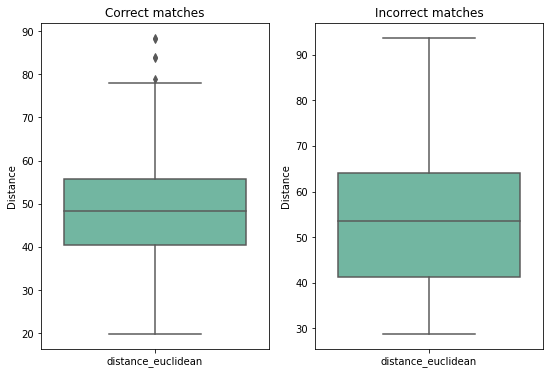

In [10]:
f, axarr = plt.subplots(1,2,figsize=(9,6), sharey=False)
sub_df = df[df.filename == df.result_euclidean]
boxplot_columns =  sub_df[["distance_euclidean"]]
sns.boxplot(ax=axarr[0],data=boxplot_columns, palette="Set2")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='', ylabel='Distance')

sub_df = df[df.filename != df.result_euclidean]
boxplot_columns =  sub_df[["distance_euclidean"]]
ax = sns.boxplot(ax=axarr[1],data=boxplot_columns, palette="Set2")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='', ylabel='Distance')

In [16]:
sub_df = df[df.filename == df.result_euclidean]
sub_df[["distance_euclidean"]].describe()

,distance_euclidean
count,363.000000
mean,48.921101
std,11.578203
min,19.795036
25%,40.545792
50%,48.313702
75%,55.704250
max,88.522354


In [20]:
Q1 = sub_df[["distance_euclidean"]].quantile(0.25)
Q3 = sub_df[["distance_euclidean"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_euclidean"]] < lower_lim)
outliers_high = (sub_df[["distance_euclidean"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_euclidean == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_euclidean == True].count()}')


Outliers low distance_euclidean    0
dtype: int64
Outliers high distance_euclidean    5
dtype: int64


In [26]:
sub_df = df[df.filename != df.result_euclidean]
sub_df[["distance_euclidean"]].describe()

,distance_euclidean
count,74.000000
mean,53.492767
std,15.560075
min,28.766142
25%,41.314603
50%,53.530453
75%,64.106862
max,93.767815


In [27]:
Q1 = sub_df[["distance_euclidean"]].quantile(0.25)
Q3 = sub_df[["distance_euclidean"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_euclidean"]] < lower_lim)
outliers_high = (sub_df[["distance_euclidean"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_euclidean == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_euclidean == True].count()}')

Outliers low distance_euclidean    0
dtype: int64
Outliers high distance_euclidean    0
dtype: int64


### Citblock

[Text(0.5, 0, ''), Text(0, 0.5, 'Distance')]

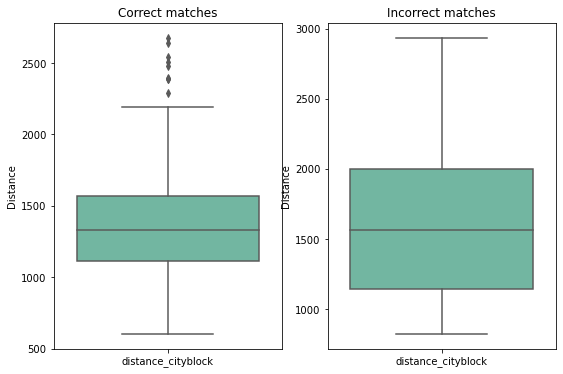

In [11]:
f, axarr = plt.subplots(1,2,figsize=(9,6), sharey=False)
sub_df = df[df.filename == df.result_cityblock]
boxplot_columns =  sub_df[["distance_cityblock"]]
sns.boxplot(ax=axarr[0],data=boxplot_columns, palette="Set2")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='', ylabel='Distance')

sub_df = df[df.filename != df.result_cityblock]
boxplot_columns =  sub_df[["distance_cityblock"]]
ax = sns.boxplot(ax=axarr[1],data=boxplot_columns, palette="Set2")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='', ylabel='Distance')

In [37]:
sub_df = df[df.filename == df.result_cityblock]
sub_df[["distance_cityblock"]].describe()

,distance_cityblock
count,358.000000
mean,1371.978882
std,347.197510
min,603.267944
25%,1114.332764
50%,1333.140991
75%,1566.146210
max,2678.311035


In [39]:
Q1 = sub_df[["distance_cityblock"]].quantile(0.25)
Q3 = sub_df[["distance_cityblock"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_cityblock"]] < lower_lim)
outliers_high = (sub_df[["distance_cityblock"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_cityblock == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_cityblock == True].count()}')

Outliers low distance_cityblock    0
dtype: int64
Outliers high distance_cityblock    9
dtype: int64


In [41]:
sub_df = df[df.filename != df.result_cityblock]
sub_df[["distance_cityblock"]].describe()

,distance_cityblock
count,79.000000
mean,1640.338379
std,560.800049
min,822.720337
25%,1142.986938
50%,1563.932617
75%,1997.377197
max,2937.744629


In [42]:
Q1 = sub_df[["distance_cityblock"]].quantile(0.25)
Q3 = sub_df[["distance_cityblock"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_cityblock"]] < lower_lim)
outliers_high = (sub_df[["distance_cityblock"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_cityblock == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_cityblock == True].count()}')

Outliers low distance_cityblock    0
dtype: int64
Outliers high distance_cityblock    0
dtype: int64


### Chebyshev

[Text(0.5, 0, ''), Text(0, 0.5, 'Distance')]

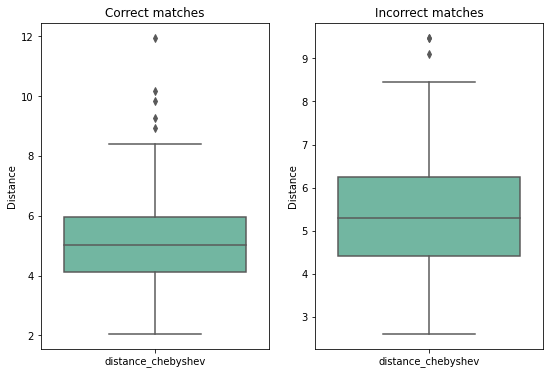

In [43]:
f, axarr = plt.subplots(1,2,figsize=(9,6), sharey=False)
sub_df = df[df.filename == df.result_chebyshev]
boxplot_columns =  sub_df[["distance_chebyshev"]]
sns.boxplot(ax=axarr[0],data=boxplot_columns, palette="Set2")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='', ylabel='Distance')

sub_df = df[df.filename != df.result_chebyshev]
boxplot_columns =  sub_df[["distance_chebyshev"]]
ax = sns.boxplot(ax=axarr[1],data=boxplot_columns, palette="Set2")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='', ylabel='Distance')

In [46]:
sub_df = df[df.filename == df.result_chebyshev]
sub_df[["distance_chebyshev"]].describe()

,distance_chebyshev
count,315.000000
mean,5.161633
std,1.437968
min,2.045897
25%,4.114051
50%,5.008081
75%,5.962887
max,11.961431


In [47]:
Q1 = sub_df[["distance_chebyshev"]].quantile(0.25)
Q3 = sub_df[["distance_chebyshev"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_chebyshev"]] < lower_lim)
outliers_high = (sub_df[["distance_chebyshev"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_chebyshev == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_chebyshev == True].count()}')

Outliers low distance_chebyshev    0
dtype: int64
Outliers high distance_chebyshev    5
dtype: int64


In [49]:
sub_df = df[df.filename != df.result_chebyshev]
sub_df[["distance_chebyshev"]].describe()

,distance_chebyshev
count,122.000000
mean,5.381132
std,1.427363
min,2.595835
25%,4.400337
50%,5.304076
75%,6.242084
max,9.484900


In [50]:
Q1 = sub_df[["distance_chebyshev"]].quantile(0.25)
Q3 = sub_df[["distance_chebyshev"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_chebyshev"]] < lower_lim)
outliers_high = (sub_df[["distance_chebyshev"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_chebyshev == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_chebyshev == True].count()}')

Outliers low distance_chebyshev    0
dtype: int64
Outliers high distance_chebyshev    3
dtype: int64


### Cosine

[Text(0.5, 0, ''), Text(0, 0.5, 'Distance')]

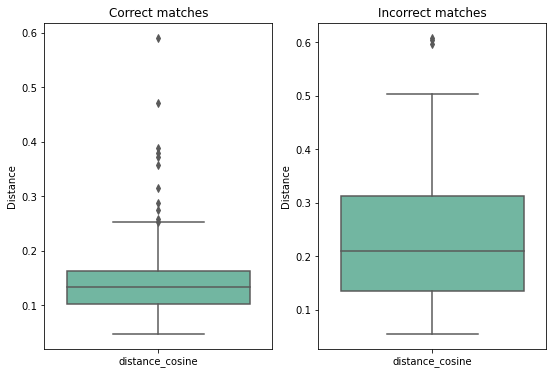

In [14]:
f, axarr = plt.subplots(1,2,figsize=(9,6), sharey=False)
sub_df = df[df.filename == df.result_cosine]
boxplot_columns =  sub_df[["distance_cosine"]]
sns.boxplot(ax=axarr[0],data=boxplot_columns, palette="Set2")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='', ylabel='Distance')

sub_df = df[df.filename != df.result_cosine]
boxplot_columns =  sub_df[["distance_cosine"]]
ax = sns.boxplot(ax=axarr[1],data=boxplot_columns, palette="Set2")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='', ylabel='Distance')

In [51]:
sub_df = df[df.filename == df.result_cosine]
sub_df[["distance_cosine"]].describe()

,distance_cosine
count,360.000000
mean,0.141208
std,0.060700
min,0.046955
25%,0.102447
50%,0.132958
75%,0.162690
max,0.591530


In [52]:
Q1 = sub_df[["distance_cosine"]].quantile(0.25)
Q3 = sub_df[["distance_cosine"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_cosine"]] < lower_lim)
outliers_high = (sub_df[["distance_cosine"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_cosine == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_cosine == True].count()}')

Outliers low distance_cosine    0
dtype: int64
Outliers high distance_cosine    11
dtype: int64


In [53]:
sub_df = df[df.filename != df.result_cosine]
sub_df[["distance_cosine"]].describe()

,distance_cosine
count,77.000000
mean,0.244835
std,0.141056
min,0.055011
25%,0.135906
50%,0.210208
75%,0.313501
max,0.608535


In [54]:
Q1 = sub_df[["distance_cosine"]].quantile(0.25)
Q3 = sub_df[["distance_cosine"]].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR


outliers_low = (sub_df[["distance_cosine"]] < lower_lim)
outliers_high = (sub_df[["distance_cosine"]] > upper_lim)
print(f'Outliers low {outliers_low[outliers_low.distance_cosine == True].count()}')
print(f'Outliers high {outliers_high[outliers_high.distance_cosine == True].count()}')

Outliers low distance_cosine    0
dtype: int64
Outliers high distance_cosine    3
dtype: int64


## Average distance values

In [15]:
print("Global")
sub_df = df
print(f'Euclidean: {sub_df.distance_euclidean.mean()}') 
print(f'Cityblock: {sub_df.distance_cityblock.mean()}') 
print(f'Minkowski: {sub_df.distance_minkowski.mean()}') 
print(f'Chebyshev: {sub_df.distance_chebyshev.mean()}') 
print(f'Cosine: {sub_df.distance_cosine.mean()}') 

print("\nCorrect matches")
sub_df = df[df.filename == df.result_euclidean]
print(f'Euclidean: {sub_df.distance_euclidean.mean()}') 
sub_df = df[df.filename == df.result_cityblock]
print(f'Cityblock: {sub_df.distance_cityblock.mean()}') 
sub_df = df[df.filename == df.result_minkowski]
print(f'Minkowski: {sub_df.distance_minkowski.mean()}') 
sub_df = df[df.filename == df.result_chebyshev]
print(f'Chebyshev: {sub_df.distance_chebyshev.mean()}') 
sub_df = df[df.filename == df.result_cosine]
print(f'Cosine: {sub_df.distance_cosine.mean()}') 


print("\nIncorrect matches")
sub_df = df[df.filename != df.result_euclidean]
print(f'Euclidean: {sub_df.distance_euclidean.mean()}') 
sub_df = df[df.filename != df.result_cityblock]
print(f'Cityblock: {sub_df.distance_cityblock.mean()}') 
sub_df = df[df.filename != df.result_minkowski]
print(f'Minkowski: {sub_df.distance_minkowski.mean()}') 
sub_df = df[df.filename != df.result_chebyshev]
print(f'Chebyshev: {sub_df.distance_chebyshev.mean()}') 
sub_df = df[df.filename != df.result_cosine]
print(f'Cosine: {sub_df.distance_cosine.mean()}') 

Global
Euclidean: 49.69524383544922
Cityblock: 1420.4923095703125
Minkowski: 49.69524383544922
Chebyshev: 5.2229108810424805
Cosine: 0.15946702659130096

Correct matches
Euclidean: 48.92110061645508
Cityblock: 1371.9788818359375
Minkowski: 48.92110061645508
Chebyshev: 5.161632537841797
Cosine: 0.1412077397108078

Incorrect matches
Euclidean: 53.492767333984375
Cityblock: 1640.33837890625
Minkowski: 53.492767333984375
Chebyshev: 5.381131649017334
Cosine: 0.24483522772789001


# Distance between first and second result ("difference")
## Setup

In [72]:
df["diffrence_euclidean"] =  df["second_distance_euclidean"] - df["distance_euclidean"]
df["diffrence_cityblock"] =  df["second_distance_cityblock"] - df["distance_cityblock"]
df["diffrence_minkowski"] =  df["second_distance_minkowski"] - df["distance_minkowski"]
df["diffrence_chebyshev"] =  df["second_distance_chebyshev"] - df["distance_chebyshev"]
df["diffrence_cosine"] =  df["second_distance_cosine"] - df["distance_cosine"]
df

,Unnamed: 0,filename,result_euclidean,distance_euclidean,second_distance_euclidean,time_euclidean,result_cityblock,distance_cityblock,second_distance_cityblock,time_cityblock,...,second_distance_minkowski_original,distance_chebyshev_original,second_distance_chebyshev_original,distance_cosine_original,second_distance_cosine_original,diffrence_euclidean,diffrence_cityblock,diffrence_minkowski,diffrence_chebyshev,diffrence_cosine
2,2,20190323114931,20190323114931,44.114964,53.902477,1.848168,20190323114931,1258.443848,1522.607178,0.055228,...,[53.902477],[4.655843],[5.377812],[0.12903178],[0.19656956],9.787514,264.163330,9.787514,0.721969,0.067538
4,4,20190323114924,20190323120301,62.728893,63.481205,0.060243,20190323120301,1973.843262,2004.999878,0.054345,...,[63.481205],[5.5088234],[5.5281525],[0.32107997],[0.34231055],0.752312,31.156616,0.752312,0.019329,0.021231
8,8,20190323114917,20190323114917,46.508453,64.770004,0.067363,20190323114917,1096.687378,1571.305664,0.058309,...,[64.770004],[5.702351],[7.391797],[0.07964456],[0.15992922],18.261551,474.618286,18.261551,1.689446,0.080285
14,14,20190323114601,20190323114601,45.230194,53.441586,0.062539,20190323114601,1154.333984,1378.455322,0.058138,...,[53.441586],[4.9337287],[5.4965343],[0.10645366],[0.16724014],8.211391,224.121338,8.211391,0.562806,0.060786
16,16,20190323114528,20190323114528,45.201653,62.217194,0.060939,20190323114528,1194.639404,1698.555420,0.055486,...,[62.217194],[4.7928863],[6.544656],[0.09250796],[0.21211547],17.015541,503.916016,17.015541,1.751770,0.119608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,548,20190323112956,20190323121457,79.158203,79.376244,0.060785,20190323121411,2715.628906,2723.071777,0.052499,...,[79.37624],[6.919272],[6.933795],[0.42362893],[0.4260484],0.218040,7.442871,0.218040,0.014523,0.002419
549,549,20190323112910,20190323112910,55.477276,73.168655,0.070150,20190323112910,1508.879150,2081.308105,0.055225,...,[73.168655],[5.311264],[7.4279127],[0.1245839],[0.2507888],17.691380,572.428955,17.691380,2.116649,0.126205
550,550,20190323112904,20190323112904,47.481674,60.464615,0.068036,20190323112904,1357.602783,1718.985840,0.055676,...,[60.464615],[4.592408],[5.749443],[0.12158859],[0.20430887],12.982941,361.383057,12.982941,1.157035,0.082720
551,551,20190323112938,20190323112938,62.722103,89.379387,0.066465,20190323112938,1624.272461,2367.592529,0.055519,...,"[89.37939, 83.99108]","[7.0884075, 7.565932]","[9.106411, 7.5901985]","[0.102653205, 0.13854152]","[0.22195822, 0.30041897]",26.657284,743.320068,26.657284,2.018003,0.119305


## Average values

In [73]:
print("Global")
sub_df = df
print(f'Euclidean: {sub_df.diffrence_euclidean.mean()}') 
print(f'Cityblock: {sub_df.diffrence_cityblock.mean()}') 
print(f'Minkowski: {sub_df.diffrence_minkowski.mean()}') 
print(f'Chebyshev: {sub_df.diffrence_chebyshev.mean()}') 
print(f'Cosine: {sub_df.diffrence_cosine.mean()}') 

print("\nCorrect matches")
sub_df = df[df.filename == df.result_euclidean]
print(f'Euclidean: {sub_df.diffrence_euclidean.mean()}') 
sub_df = df[df.filename == df.result_cityblock]
print(f'Cityblock: {sub_df.diffrence_cityblock.mean()}') 
sub_df = df[df.filename == df.result_minkowski]
print(f'Minkowski: {sub_df.diffrence_minkowski.mean()}') 
sub_df = df[df.filename == df.result_chebyshev]
print(f'Chebyshev: {sub_df.diffrence_chebyshev.mean()}') 
sub_df = df[df.filename == df.result_cosine]
print(f'Cosine: {sub_df.diffrence_cosine.mean()}') 


print("\nIncorrect matches")
sub_df = df[df.filename != df.result_euclidean]
print(f'Euclidean: {sub_df.diffrence_euclidean.mean()}') 
sub_df = df[df.filename != df.result_cityblock]
print(f'Cityblock: {sub_df.diffrence_cityblock.mean()}') 
sub_df = df[df.filename != df.result_minkowski]
print(f'Minkowski: {sub_df.diffrence_minkowski.mean()}') 
sub_df = df[df.filename != df.result_chebyshev]
print(f'Chebyshev: {sub_df.diffrence_chebyshev.mean()}') 
sub_df = df[df.filename != df.result_cosine]
print(f'Cosine: {sub_df.diffrence_cosine.mean()}') 

Global
Euclidean: 9.969598770141602
Cityblock: 302.249755859375
Minkowski: 9.969598770141602
Chebyshev: 0.7996676564216614
Cosine: 0.07265589386224747

Correct matches
Euclidean: 11.638184547424316
Cityblock: 356.8536071777344
Minkowski: 11.638184547424316
Chebyshev: 1.0240377187728882
Cosine: 0.0844811350107193

Incorrect matches
Euclidean: 1.7845063209533691
Cityblock: 54.804359436035156
Minkowski: 1.7845063209533691
Chebyshev: 0.22035111486911774
Cosine: 0.017369067296385765


## Distance distribution

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


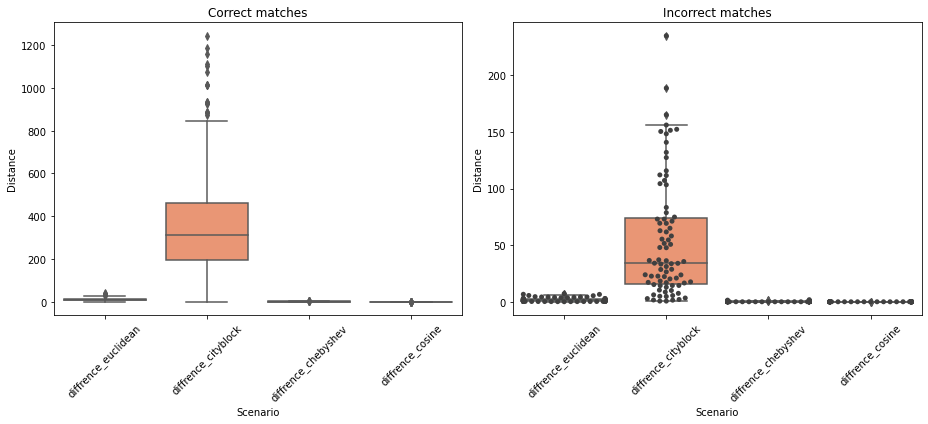

In [74]:
sub_df_a = pd.DataFrame(df[df.filename == df.result_euclidean]["diffrence_euclidean"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename == df.result_cityblock]["diffrence_cityblock"]).assign(Trial=2)
# sub_df_c = pd.DataFrame(df[df.filename == df.result_minkowski]["diffrence_minkowski"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename == df.result_chebyshev]["diffrence_chebyshev"]).assign(Trial=4)
sub_df_e = pd.DataFrame(df[df.filename == df.result_cosine]["diffrence_cosine"]).assign(Trial=5)

# cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d, sub_df_e])    
cdf = pd.concat([sub_df_a, sub_df_b, sub_df_d, sub_df_e])    
mdf = pd.melt(cdf, id_vars=['Trial']) 



f, axarr = plt.subplots(1,2,figsize=(13,6), sharey=False)

sns.boxplot(ax=axarr[0], x="variable", y="value", data=mdf, palette="Set2")
#sns.swarmplot(ax=axarr[0], x="variable", y="value", data=mdf, color=".95")
axarr[0].set_title("Correct matches")
axarr[0].set(xlabel='Scenario', ylabel='Distance')
axarr[0].tick_params(axis='x', rotation=45)

sub_df_a = pd.DataFrame(df[df.filename != df.result_euclidean]["diffrence_euclidean"]).assign(Trial=1)
sub_df_b = pd.DataFrame(df[df.filename != df.result_cityblock]["diffrence_cityblock"]).assign(Trial=2)
#sub_df_c = pd.DataFrame(df[df.filename != df.result_minkowski]["diffrence_minkowski"]).assign(Trial=3)
sub_df_d = pd.DataFrame(df[df.filename != df.result_chebyshev]["diffrence_chebyshev"]).assign(Trial=4)
sub_df_e = pd.DataFrame(df[df.filename != df.result_cosine]["diffrence_cosine"]).assign(Trial=5)

# cdf = pd.concat([sub_df_a, sub_df_b, sub_df_c, sub_df_d, sub_df_e])    
cdf = pd.concat([sub_df_a, sub_df_b, sub_df_d, sub_df_e])    
mdf = pd.melt(cdf, id_vars=['Trial']) 

sns.boxplot(ax=axarr[1], x="variable", y="value", data=mdf, palette="Set2")
sns.swarmplot(ax=axarr[1], x="variable", y="value", data=mdf, color=".25")
axarr[1].set_title("Incorrect matches")
axarr[1].set(xlabel='Scenario', ylabel='Distance')
axarr[1].tick_params(axis='x', rotation=45)
f.tight_layout()
f.savefig('/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/src/benchmark_images/bxplt_difference_keypoints.png',bbox_inches='tight', dpi=150)

# Time distribution

[Text(0.5, 0, 'Scenario'), Text(0, 0.5, 'Distance')]

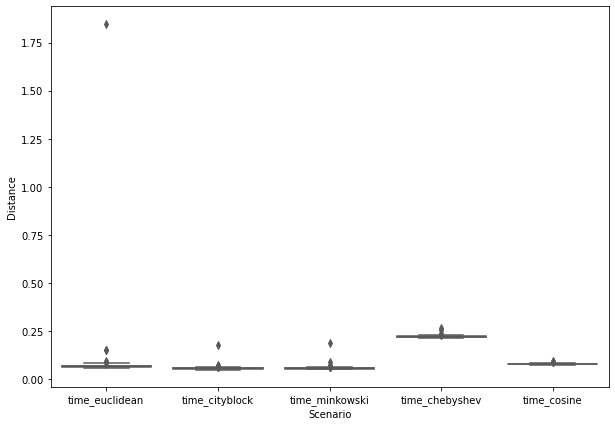

In [18]:
boxplot_columns =  df[["time_euclidean","time_cityblock","time_minkowski","time_chebyshev","time_cosine"]]
ax = sns.boxplot(data=boxplot_columns, palette="Set2")
ax.figure.set_size_inches(10, 7)
ax.set(xlabel='Scenario', ylabel='Distance')

# Average timing

In [19]:
print(f"Average: {df.time_euclidean.mean()}")
print(f"Average: {df.time_cityblock.mean()}")
print(f"Average: {df.time_minkowski.mean()}")
print(f"Average: {df.time_chebyshev.mean()}")
print(f"Average: {df.time_cosine.mean()}")

Average: 0.0705375149846077
Average: 0.055674824863672256
Average: 0.05607287958264351
Average: 0.2211626172065735
Average: 0.07826009392738342


# Visualization

74
IMG_20190323_123727.jpg


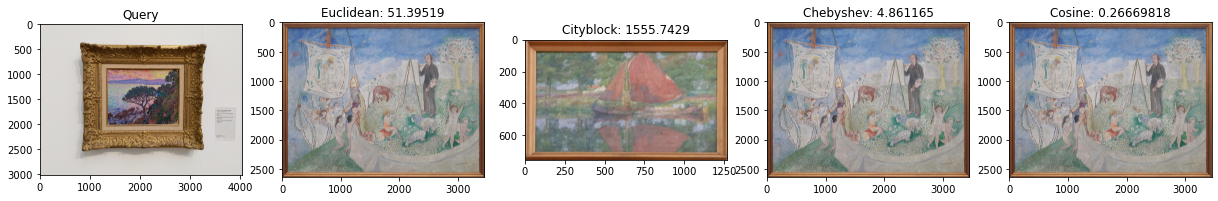

In [31]:
DATABASE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Database/"
TEST_IMAGE_DIR = "/Users/lennertsteyaert/Documents/GitHub/computervisie-group8/data/Computervisie 2020 Project Database/dataset_pictures_msk"


def load_image(path):
    # img = tf.keras.utils.load_img(path)
    img = tf.keras.preprocessing.image.load_img(path)
    return img


def get_directory(img):
    directory_list = os.listdir(TEST_IMAGE_DIR)

    for file in directory_list:
        directory = os.fsdecode(file)
        sub_dir_path = TEST_IMAGE_DIR + '/' + directory

        if (os.path.isdir(sub_dir_path)):
            for image_name in os.listdir(sub_dir_path):
                filename = os.fsdecode(image_name)
                if filename == img:
                    return sub_dir_path


def show_row_first_results(df,index):
    global TEST_IMAGE_DIR
    global DATABASE_DIR

    print(df.iloc[index].filename_original)
    
    directory = get_directory(df.iloc[index].filename_original)



    f, axarr = plt.subplots(1,5,figsize=(21,4))


    image = load_image(directory + "/" + df.iloc[index].filename_original)
    axarr[0].imshow(image)
    axarr[0].set_title("Query")

    if (len(df.iloc[index].result_euclidean_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_euclidean_original[0])
        axarr[1].imshow(image)
        axarr[1].set_title("Euclidean: " + str(df.iloc[index].distance_euclidean_original[0]))


    if (len(df.iloc[index].result_cityblock_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_cityblock_original[0])
        axarr[2].imshow(image)
        axarr[2].set_title("Cityblock: " + str(df.iloc[index].distance_cityblock_original[0]))


    if (len(df.iloc[index].result_chebyshev_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_chebyshev_original[0])
        axarr[3].imshow(image)
        axarr[3].set_title("Chebyshev: " + str(df.iloc[index].distance_chebyshev_original[0]))



    if (len(df.iloc[index].result_cosine_original)  > 0):
        image = load_image(DATABASE_DIR + df.iloc[index].result_cosine_original[0])
        axarr[4].imshow(image)
        axarr[4].set_title("Cosine: " + str(df.iloc[index].distance_cosine_original[0]))




# print(df.iloc[0].filename)
# print(get_directory(df.iloc[0].filename))


sub_test = df[df.filename != df.result_euclidean]
print(len(sub_test))
show_row_first_results(sub_test,9)

# sub_test = df[df.filename != df.result_50_features]
# print(len(sub_test))

# show_row_first_results(sub_test,2)



# for i in range(0,len(sub_test)):
#     show_row_first_results(sub_test,i)